En este script se prueban distintos filtros previos a la segmentación de las células de la madera.

In [1]:
import numpy as np
import imutils
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage



(1842, 2456, 3)


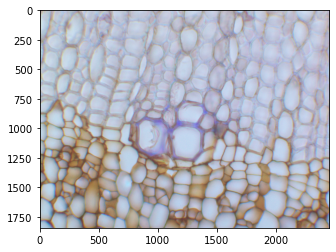

In [13]:
img = plt.imread('../Data/Mappia_photos/10X/mappia_10x_0005.tif')
img_cv = cv.imread('../Data/Mappia_photos/10X/mappia_10x_0005.tif')
#stitch = cv.imread('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1.png')
zero1 = cv.imread('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_40_001.tif')
img_array = np.asarray(img)
zero1_array = np.asarray(zero1)
#stitch_array= np.asarray(stitch)
print(img_array.shape)
plt.imshow(zero1, "gray")

(array([  13935.,  161457.,  344329.,  547124.,  897067., 1635094.,
        3611964., 4259828., 1759759.,  341299.]),
 array([ 38. ,  59.4,  80.8, 102.2, 123.6, 145. , 166.4, 187.8, 209.2,
        230.6, 252. ]),
 <a list of 10 Patch objects>)

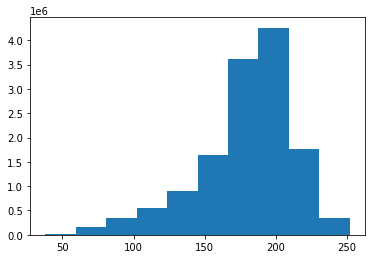

In [4]:
#plt.hist(stitch_array.ravel())
plt.hist(zero1_array.ravel())

In [14]:
rgb_img = cv.cvtColor(img_cv, cv.COLOR_BGR2RGB)
gray_img = cv.cvtColor(rgb_img, cv.COLOR_BGR2GRAY)
bgr_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2BGR)
#
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_rgb.png', rgb_img)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_rgay.png', gray_img)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_bgr.png', bgr_img)

###
#rgb_stitch = cv.cvtColor(stitch, cv.COLOR_BGR2RGB)
#gray_stitch= cv.cvtColor(stitch, cv.COLOR_BGR2GRAY)
#bgr_stitch = cv.cvtColor(stitch, cv.COLOR_RGB2BGR)
#
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_rgb.png',rgb_stitch)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_gray.png',gray_stitch)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_bgr.png',bgr_stitch)

rgb_zero1 = cv.cvtColor(zero1, cv.COLOR_BGR2RGB)
gray_zero1 = cv.cvtColor(zero1, cv.COLOR_BGR2GRAY)
bgr_zero1 = cv.cvtColor(zero1, cv.COLOR_RGB2BGR)

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_RGB.jpg',rgb_zero1)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_GRAY.jpg', gray_zero1)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_BGR.jpg', bgr_zero1)


True

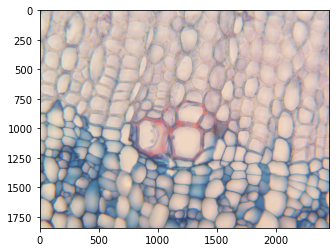

In [6]:
plt.imshow(rgb_zero1, cmap="gray", vmin=0, vmax=255)

Sección corta para aumentar el contraste de la imágen.

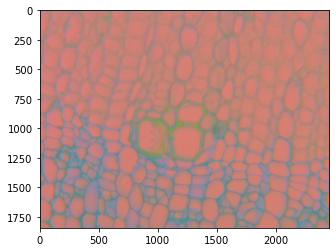

In [15]:
#-----Converting image to LAB Color model----------------------------------- 
lab= cv.cvtColor(rgb_zero1, cv.COLOR_BGR2LAB)
plt.imshow(lab)

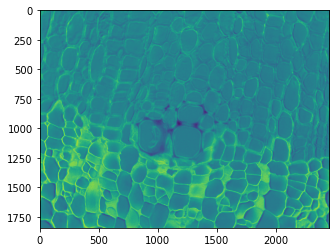

In [16]:
#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv.split(lab)
plt.imshow(l)
plt.imshow(a)
plt.imshow(b)


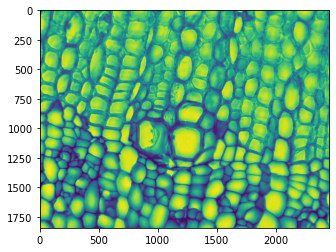

In [17]:
#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
plt.imshow(cl)

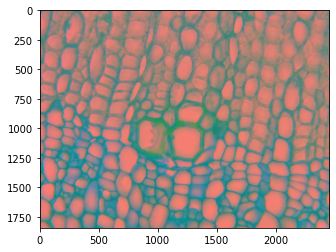

In [18]:
#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv.merge((cl,a,b))
plt.imshow(limg)

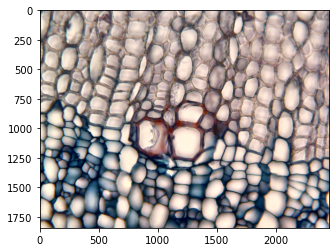

In [19]:
#-----Converting image from LAB Color model to RGB model--------------------
final = cv.cvtColor(limg, cv.COLOR_LAB2BGR)
plt.imshow(final,cmap="gray", vmin=0, vmax=255)

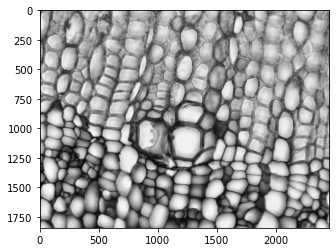

In [34]:
gray_enh = cv.cvtColor(final, cv.COLOR_BGR2GRAY)
plt.imshow(gray_enh,cmap="gray", vmin=0, vmax=255)

In [35]:
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_enh.jpg', final)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_grayenh.jpg', gray_enh)


True

Los siguientes tres bloques de código muestran la distribución de valores de imágenes en escala de grises para hacer una ecualización y distribuir más uniformemente las intensidades.

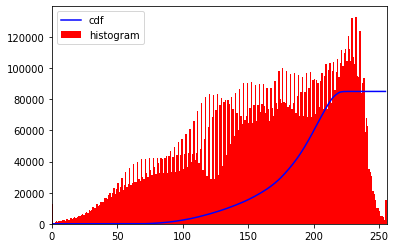

In [19]:
hist,bins = np.histogram(gray_zero1.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [20]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

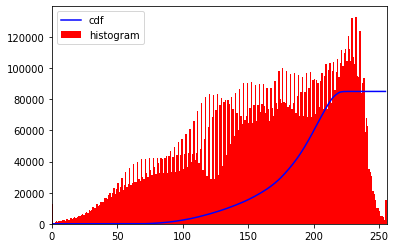

In [21]:
gray_img2 = cdf[gray_zero1]
hist,bins = np.histogram(gray_zero1.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


True

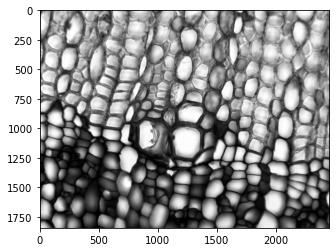

In [22]:
#equ = cv.equalizeHist(gray_stitch)
equ = cv.equalizeHist(gray_zero1)
plt.imshow(equ, cmap="gray", vmin=0, vmax=255)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_gray_equ.png',equ)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_gray_equ.png',equ)

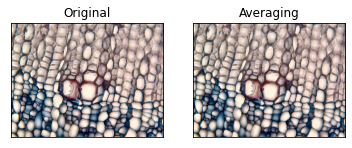

True

In [37]:
kernel = np.ones((7,7),np.float32)/49
#dst = cv.filter2D(rgb_stitch,-1,kernel)
dst = cv.filter2D(final,-1,kernel)

plt.imshow(equ, cmap="gray", vmin=0, vmax=255)
plt.subplot(121),plt.imshow(final),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_rgb_2d.png',dst)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_enhdst.png',dst)

True

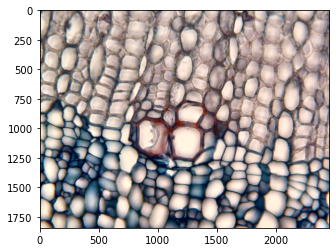

In [38]:
blur = cv.GaussianBlur(final,(5,5),0)
plt.imshow(blur)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_rgb_gauss.png',blur)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_enhblur.png',blur)

True

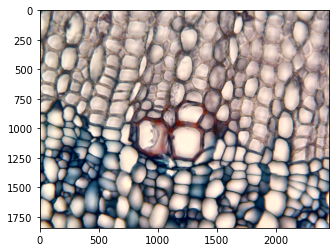

In [42]:
median = cv.medianBlur(final,5)
plt.imshow(median)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_rgb_median.png',median)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_enhmed.png',median)

True

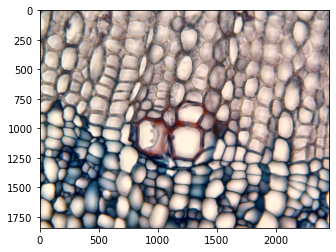

In [43]:
bil = cv.bilateralFilter(final,9,200,200)
plt.imshow(bil)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_rgb_bilateral.png',bil)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_enhbil.png',bil)

True

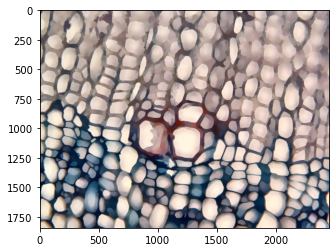

In [44]:
shifted = cv.pyrMeanShiftFiltering(final, 21, 51)
plt.imshow(shifted)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_rgb_shifted.png',shifted)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_enhshifted.png',shifted)

In [47]:
#Convertirla a escala de grises los filtros
#plt.imshow(gray_stitch, cmap="gray", vmin=0, vmax=255)

gray_dst = cv.cvtColor(dst,cv.COLOR_BGR2GRAY)
gray_blur = cv.cvtColor(blur,cv.COLOR_BGR2GRAY)
gray_median = cv.cvtColor(median,cv.COLOR_BGR2GRAY)
gray_bil = cv.cvtColor(bil,cv.COLOR_BGR2GRAY)
gray_shifted = cv.cvtColor(shifted,cv.COLOR_BGR2GRAY)

#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_gray_dst.png',gray_dst)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_gray_blur.png',gray_blur)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_gray_median.png',gray_median)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_gray_bilateral.png',gray_bil)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_gray_shifted.png',gray_shifted)
#la imágen sola en 40x
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_grayshifted.png',gray_dst)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_grayblur.png',gray_blur)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_graymedian.png',gray_median)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_graybil.png',gray_bil)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_grayshifted.png',gray_shifted)


True

In [49]:
equ_gr_dst = cv.equalizeHist(gray_dst)
equ_gr_blur = cv.equalizeHist(gray_blur)
equ_gr_median = cv.equalizeHist(gray_median)
equ_gr_bil = cv.equalizeHist(gray_bil)
equ_gr_shifted = cv.equalizeHist(gray_shifted)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_equgray_dst.png',equ_gr_bil)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_equgray_blur.png',equ_gr_blur)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_equgray_median.png',equ_gr_dst)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_equgray_bilateral.png',equ_gr_median)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1_equgray_shifted.png',equ_gr_shifted)
#la imágen sola en 40x
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_eqgrayshifted.png',equ_gr_dst)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_eqgrayblur.png',equ_gr_blur)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_eqgraymedian.png',equ_gr_median)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_eqgraybil.png',equ_gr_bil)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_eqgrayshifted.png',equ_gr_shifted)


True

In [54]:
# global thresholding
ret1,th1_enh = cv.threshold(gray_enh,127,255,cv.THRESH_BINARY) #dst filter
# Otsu's thresholding
ret2,th2_enh = cv.threshold(gray_enh,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #dst filter
####Filters
# global thresholding
ret1,th1_dst = cv.threshold(equ_gr_dst,127,255,cv.THRESH_BINARY) #dst filter
# Otsu's thresholding
ret2,th2_dst = cv.threshold(equ_gr_dst,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #dst filter
# global thresholding
ret1,th1_blur = cv.threshold(equ_gr_blur,127,255,cv.THRESH_BINARY) #gaussian blur
# Otsu's thresholding
ret2,th2_blur = cv.threshold(equ_gr_blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #gaussian blur
# global thresholding
ret1,th1_med = cv.threshold(equ_gr_median,127,255,cv.THRESH_BINARY) #Median filter
# Otsu's thresholding
ret2,th2_med = cv.threshold(equ_gr_median,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #median filter
# global thresholding
ret1,th1_bil = cv.threshold(equ_gr_bil,127,255,cv.THRESH_BINARY) #bilateral filter
# Otsu's thresholding
ret2,th2_bil = cv.threshold(equ_gr_bil,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #bilateral filter
# global thresholding
ret1,th1_shift = cv.threshold(equ_gr_shifted,127,255,cv.THRESH_BINARY) #shifted filter
# Otsu's thresholding
ret2,th2_shift = cv.threshold(equ_gr_shifted,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #shifted filter

In [55]:
#Guardar las imágenes después del thresholding por diferentes métodos.
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitchth1dst.png',th1_dst)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1th2dst.png',th2_dst)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1th1blur.png', th1_blur)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1th2blur.png', th2_blur)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1th1med.png', th1_med)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1th2med.png', th2_med)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1th1bil.png', th1_bil)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1th2bil.png', th2_bil)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1th1shift.png', th1_shift)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitch1th2shift.png', th2_shift)
###Para la imágen en 40x
#Normal 
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th1enh.png',th1_enh)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2enh.png',th2_enh)

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2shift.png',th1_dst)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th1shift.png',th2_dst)

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th1blur.png',th1_blur)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2blur.png',th2_blur)

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th1median.png',th1_med)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2median.png',th2_med)

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th1bil.png',th1_bil)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2bil.png',th2_bil)

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th1shifted.png',th1_shift)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2shifted.png',th2_shift)



True

In [57]:
th1enh_2 = cv.bitwise_not(th1_enh)
th2enh_2 = cv.bitwise_not(th2_enh)
th1dst_2 = cv.bitwise_not(th1_dst)
th2dst_2 = cv.bitwise_not(th2_dst)
th1blur_2 = cv.bitwise_not(th1_blur)
th2blur_2 = cv.bitwise_not(th2_blur)
th1med_2 = cv.bitwise_not(th1_med)
th2med_2 = cv.bitwise_not(th2_med)
th1bil_2 = cv.bitwise_not(th1_bil)
th2bil_2 = cv.bitwise_not(th2_bil)
th1shift_2 = cv.bitwise_not(th1_shift)
th2shift_2 = cv.bitwise_not(th2_shift)

#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitchthth1dst_2.png', th1dst_2)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitchthth2dst_2.png', th2dst_2)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitchthth1blur_2.png', th1blur_2)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitchthth2blur_2.png', th2blur_2)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitchthth1med_2.png', th1med_2)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitchthth2med_2.png', th2med_2)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitchthth1bil_2.png', th1bil_2)
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/stitchthth2bil_2.png', th2bil_2)

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th1enh2.png',th1enh_2)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2enh2.png',th2enh_2)

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2shift2.png',th1dst_2)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th1shift2.png',th2dst_2)

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th1blur2.png',th1blur_2)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2blur2.png',th2blur_2)

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th1median2.png',th1med_2)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2median2.png',th2med_2)

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th1bil2.png',th1bil_2)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2bil2.png',th2bil_2)

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th1shifted2.png',th1shift_2)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2shifted2.png',th2shift_2)


True

Adelgazar paredes de las imágenes

In [59]:
blur_thinned = cv.ximgproc.thinning(th2blur_2)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2blurthinned.png',blur_thinned)

True

In [60]:
enh_thinned = cv.ximgproc.thinning(th2enh_2)
med_thinned = cv.ximgproc.thinning(th2med_2)
shift_thinned = cv.ximgproc.thinning(th2shift_2)

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2enhthinned.png',enh_thinned)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2medthinned.png',med_thinned)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2shiftthinned.png',shift_thinned)

True

Evaluar la segmentación a partir del número de centroides. Comparar contra una segmentación manual en imagej.

In [61]:
def out_seg(image):
    # find contours in the thresholded image
    cnts,hierarchy = cv.findContours(image, cv.RETR_TREE,cv.CHAIN_APPROX_NONE)#SIMPLE#RETR_EXTERNAL
    param_img={"centroids":[],"areas":[], "perimeters":[]}
    #make array of centroids
    #Array of areas
    #Array for perimeters
    # loop over the contours
    for c in cnts:
    # compute the center of the contour
        M = cv.moments(c) #que es moments?¡¿
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0
    # draw the contour and center of the shape on the image
        #cv.drawContours(th3_2, [c], -1, (0, 255, 0), 2)
        #cv.circle(th3_2, (cX, cY), 7, (255, 255, 255), -1)
        param_img["centroids"].append([cX, cY])
        param_img["areas"].append(cv.contourArea(c))
        param_img["perimeters"].append(cv.arcLength(c,True))
    return param_img

In [74]:
param_th1dst2 = out_seg(th1dst_2) 
param_th2dst2 = out_seg(th2dst_2) 
param_th1blur2 = out_seg(th1blur_2)
param_th2blur2 = out_seg(th2blur_2) 
param_th1med2 = out_seg(th1med_2)
param_th2med2 = out_seg(th2med_2)
param_th1bil2 = out_seg(th1bil_2)
param_th2bil2 = out_seg(th2bil_2)
param_th1enh2 = out_seg(th1enh_2) 
param_th2enh2 = out_seg(th2enh_2) 
param_th1shift2 = out_seg(th1shift_2) 
param_th2shift2 = out_seg(th2shift_2) 
param_enhthinned = out_seg(enh_thinned)
param_medthinned = out_seg(med_thinned)
param_shiftthinned = out_seg(shift_thinned)
param_blurthinned = out_seg(blur_thinned)


In [75]:
#param_th1bil2["centroids"]
th1dstdf = pd.DataFrame(param_th1dst2)
th2dstdf = pd.DataFrame(param_th2dst2) 
th1blurdf = pd.DataFrame(param_th1blur2)
th2blurdf = pd.DataFrame(param_th2blur2) 
th1meddf = pd.DataFrame(param_th1med2)
th2meddf = pd.DataFrame(param_th2med2)
th1bildf = pd.DataFrame(param_th1bil2)
th2bildf = pd.DataFrame(param_th2bil2)
th1enhdf = pd.DataFrame(param_th1enh2)
th2enhdf = pd.DataFrame(param_th2enh2)
th1shiftdf = pd.DataFrame(param_th1shift2)
th2shiftdf = pd.DataFrame(param_th2shift2)
enhthinneddf = pd.DataFrame(param_enhthinned)
medthinneddf = pd.DataFrame(param_medthinned)
shiftthinneddf = pd.DataFrame(param_shiftthinned)
blurthinneddf = pd.DataFrame(param_blurthinned)

#Guardar las data frames para analizarlas en R. Ver si se puede aquí con pandas


In [76]:
th1dstdf.insert(0, "Segmentation", np.repeat("distancefilt_binarythreshold", np.shape(th1dstdf)[0]), True)
th2dstdf.insert(0, "Segmentation", np.repeat("distancefilt_otsuthreshold", np.shape(th2dstdf)[0]), True) 
th1blurdf.insert(0, "Segmentation", np.repeat("blurfilt_binarythreshold", np.shape(th1blurdf)[0]), True) 
th2blurdf.insert(0, "Segmentation", np.repeat("blurfilt_otsuthreshold", np.shape(th2blurdf)[0]), True) 
th1meddf.insert(0, "Segmentation", np.repeat("medianfilt_binarythreshold", np.shape(th1meddf)[0]), True) 
th2meddf.insert(0, "Segmentation", np.repeat("medianfilt_otsuthreshold", np.shape(th2meddf)[0]), True)
th1bildf.insert(0, "Segmentation", np.repeat("bilateralfilt_binarythreshold", np.shape(th1bildf)[0]), True) 
th2bildf.insert(0, "Segmentation", np.repeat("bilateralfilt_otsuthreshold", np.shape(th2bildf)[0]), True) 
th1enhdf.insert(0, "Segmentation", np.repeat("enhance_binarythreshold", np.shape(th1enhdf)[0]), True) 
th2enhdf.insert(0, "Segmentation", np.repeat("enhance_otsuthreshold", np.shape(th2enhdf)[0]), True) 
th1shiftdf.insert(0, "Segmentation", np.repeat("shift_binarythreshold", np.shape(th1shiftdf)[0]), True) 
th2shiftdf.insert(0, "Segmentation", np.repeat("shift_otsuthreshold", np.shape(th2shiftdf)[0]), True) 
enhthinneddf.insert(0, "Segmentation", np.repeat("skeleton_enh", np.shape(enhthinneddf)[0]), True)  
medthinneddf.insert(0, "Segmentation", np.repeat("skeleton_med", np.shape(medthinneddf)[0]), True)   
shiftthinneddf.insert(0, "Segmentation", np.repeat("skeleton_shift", np.shape(shiftthinneddf)[0]), True)    
blurthinneddf.insert(0, "Segmentation", np.repeat("skeleton_blur", np.shape(blurthinneddf)[0]), True)  


In [77]:
segmentationDF = pd.concat([th1dstdf,th2dstdf,th1blurdf,th2blurdf,th1meddf,th2meddf,th1bildf,th2bildf,th1enhdf,
                           th2enhdf,th1shiftdf,th2shiftdf,enhthinneddf,medthinneddf,shiftthinneddf,blurthinneddf], axis=0)
#segmentationDF.to_csv('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/stitched/segmentation_DF.csv', index=False)
segmentationDF.to_csv('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/segmentation_DF_40x001.csv', index=False)


Aquí termina la parte de segmentar utilizando distintos filtros. Falta hacer el método manual con imagJ.
Realizar el plot con los puntos para una de las imágenes y tener una idea de donde se colocaron los centroides.


True

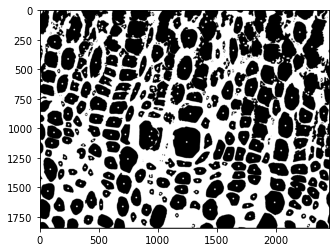

In [86]:
th2bil_2_copy= th2bil_2.copy()
cnts,hierarchy = cv.findContours(th2bil_2, cv.RETR_TREE,cv.CHAIN_APPROX_NONE)#SIMPLE#RETR_EXTERNAL
    #make array of centroids
    #Array of areas
    #Array for perimeters
    # loop over the contours
for c in cnts:
# compute the center of the contour
    M = cv.moments(c) #que es moments?¡¿
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
# draw the contour and center of the shape on the image
    cv.drawContours(th2bil_2_copy, [c], -1, (0, 255, 0), 2)
    cv.circle(th2bil_2_copy, (cX, cY), 7, (255, 255, 255), -1)
plt.imshow(th2bil_2_copy, cmap="gray", vmin=0, vmax=255)    

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2bil_centroids.png',th2bil_2_copy)

True

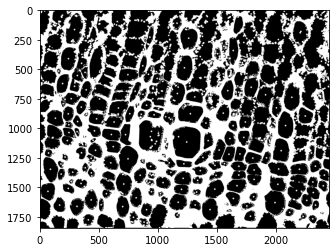

In [84]:
th2enh_2_copy= th2enh_2.copy()
cnts,hierarchy = cv.findContours(th2enh_2, cv.RETR_TREE,cv.CHAIN_APPROX_NONE)#SIMPLE#RETR_EXTERNAL
    #make array of centroids
    #Array of areas
    #Array for perimeters
    # loop over the contours
for c in cnts:
# compute the center of the contour
    M = cv.moments(c) #que es moments?¡¿
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
# draw the contour and center of the shape on the image
    cv.drawContours(th2enh_2_copy, [c], -1, (0, 255, 0), 2)
    cv.circle(th2enh_2_copy, (cX, cY), 7, (255, 255, 255), -1)
plt.imshow(th2enh_2_copy, cmap="gray", vmin=0, vmax=255)    

cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/40X/prueba/EPM6_001_th2enh_centroids.png',th2enh_2_copy)


Parece que las imágenes en 40x tienen un pobre contraste. Auqnue se aumente el contraste de la imágen algunas paredes no se definen bien y por lo tanto la segmentación no es la mejor. Realizar el análisis con una imágen a 10X y comparar la segmentación manual con diferentes segmentación automática.

In [20]:
#import huang_filter
#huang_filter.Huang(gray_zero1)
#help(huang_filter)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

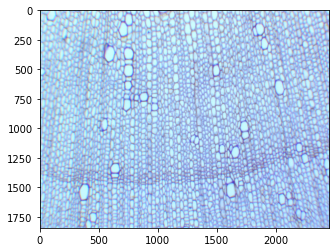

In [66]:
epm6_015 = cv.imread('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/EPM6_015.tif')
#rgb_zero1 = cv.cvtColor(zero1, cv.COLOR_BGR2RGB)
import filters
def labcolor(image):
    """ Labcolor is a function to transform the image with the lab method"""
    rgb_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    lab = cv.cvtColor(rgb_img, cv.COLOR_RGB2LAB)
    l,a,b = cv.split(lab)
    clahe = cv.createCLAHE(clipLimit = 3.0, tileGridSize = (8,8))
    cl = clahe.apply(l)
    limg = cv.merge((cl, a, b))
    lab_rgb = cv.cvtColor(limg, cv.COLOR_LAB2RGB)
    return lab_rgb

def getfilters(image):
    """ This function retrieves an image in different filters.
        Avoids writing repetive tasks. """
    images = {}
    lab_img = labcolor(image)
    images["Labcolor"] = lab_img
    rgb_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    #Distance filter
    kernel = np.ones((7,7), np.float32)/49
    dst = cv.filter2D(rgb_img, -1, kernel)
    images["Distance"] = dst
    #Blur filter
    blur = cv.GaussianBlur(rgb_img, (5,5), 0)
    images["Blur"] = blur
    #Median filter
    median = cv.medianBlur(rgb_img, 5)
    images["median"] = median   
    #Bilateral filter
    bil = cv.bilateralFilter(rgb_img, 9,200,200)
    images["bilateral"] = bil
    #Shifted
    shifted = cv.pyrMeanShiftFiltering(rgb_img, 21, 51)
    images["shifted"] = shifted
    return  images

def thresholding(image):
    """The function recieves an image an performs to types of thresholding:
     global and Otsu's""" 
    threshold = []
    # global thresholing
    ret1,th1 = cv.threshold(image,127,255,cv.THRESH_BINARY) #dst filter
    # Otsu's thresholding
    ret2,th2 = cv.threshold(image,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #dst filter
    threshold.append(th1)
    threshold.append(th2)
    return threshold

plt.imshow(epm6_015)    

In [81]:
filters.help()

AttributeError: module 'filters' has no attribute 'help'

In [45]:
filters=getfilters(epm6_015)   

In [53]:
gray={}
for k, v in filters.items():
    gray[k] = cv.cvtColor(v,cv.COLOR_BGR2GRAY)

In [73]:
gray.keys()

dict_keys(['Labcolor', 'Distance', 'Blur', 'median', 'bilateral', 'shifted'])

In [7]:
prueba_dict = {'labcol11':{'centroids':[[3,2],[4,5]], 'perimeters':[3,6], 'areas':[4.0,3.0]}, 
               'dst11':{'centroids':[[6,1],[7,6]], 'perimeters':[7,8], 'areas':[5.0,2.0]} }

print(prueba_dict.items())
#pruebadf = pd.DataFrame(prueba_dict, columns = )

dict_items([('labcol11', {'centroids': [[3, 2], [4, 5]], 'perimeters': [3, 6], 'areas': [4.0, 3.0]}), ('dst11', {'centroids': [[6, 1], [7, 6]], 'perimeters': [7, 8], 'areas': [5.0, 2.0]})])


In [29]:
   
print(appended_data)
    
    #appended_data = []
#for infile in glob.glob("*.xlsx"):
 #   data = pandas.read_excel(infile)
    # store DataFrame in list
  #  appended_data.append(data)
# see pd.concat documentation for more info

#th1dstdf.insert(0, "Segmentation", np.repeat("distancefilt_binarythreshold", np.shape(th1dstdf)[0]), True)

#pd.concat(frames, keys=filter_ids)

#pd.DataFrame(param_blurthinned)
#pruebadf = pd.DataFrame(prueba)
 #columns = ['keys','values'])

2
  Segmentation centroids  perimeters  areas
0     labcol11    [3, 2]           3    4.0
1     labcol11    [4, 5]           6    3.0
0        dst11    [6, 1]           7    5.0
1        dst11    [7, 6]           8    2.0


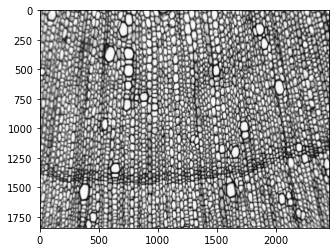

In [57]:
plt.imshow(gray["Labcolor"], cmap="gray", vmin=0, vmax=255)    

In [67]:
threshold_img={}
for k, v in gray.items():
    threshold_img[k] =thresholding(v)

dict_keys(['Labcolor', 'Distance', 'Blur', 'median', 'bilateral', 'shifted'])


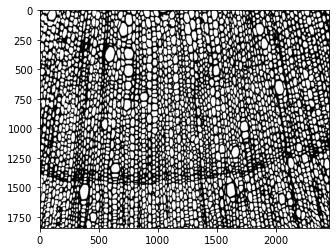

In [75]:
print(threshold_img.keys())
plt.imshow(threshold_img["Labcolor"][1], cmap="gray", vmin=0, vmax=255)    

In [77]:
for k, v in threshold_img.items():
    cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/png',k[v][0])
    cv.imwrite('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/png',k[v][1])
    

TypeError: unhashable type: 'numpy.ndarray'

In [15]:
smooth = cv.addWeighted(blur,1.5,img,-0.5,0)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_edges.png', smooth)
gray_smooth = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_edgray.png', gray_smooth)
# global thresholding
ret1,th1_smooth = cv.threshold(gray_smooth,127,255,cv.THRESH_BINARY) #dst filter
# Otsu's thresholding
ret2,th2_smooth = cv.threshold(gray_smooth,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #dst filter
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1smooth.png', th1_smooth)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2smooth.png', th2_smooth)
#
th1smooth_2 = cv.bitwise_not(th1_smooth)
th2smooth_2 = cv.bitwise_not(th2_smooth)
#
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1smooth_2.png', th1smooth_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2smooth_2.png', th2smooth_2)

True

Aquí se realiza un adelgazamiento de las paredes.

In [16]:
smooth_thinned = cv.ximgproc.thinning(th2smooth_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_smooth_thinned.png', smooth_thinned)

True

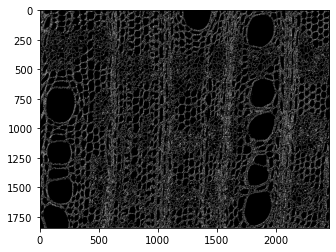

In [17]:
plt.imshow(smooth_thinned, cmap="gray", vmin=0, vmax=255)

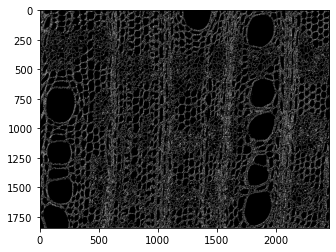

In [18]:
blur_thinned = cv.ximgproc.thinning(th2blur_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_blur_thinned.png', blur_thinned)
plt.imshow(smooth_thinned, cmap="gray", vmin=0, vmax=255)

In [19]:
# convolute with proper kernels
laplacian = cv.Laplacian(gray_bil,cv.CV_64F)
sobelx = cv.Sobel(gray_bil,cv.CV_64F,1,0,ksize=5)  # x
sobely = cv.Sobel(gray_bil,cv.CV_64F,0,1,ksize=5)  # y
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_lapl.png', laplacian)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_sobel.png', sobelx)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_sobely.png', sobely)

True

In [20]:
#Convertirla a escala de grises
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

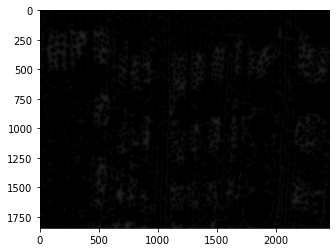

In [21]:
plt.imshow(dist_transform, cmap="gray", vmin=0, vmax=255)

True

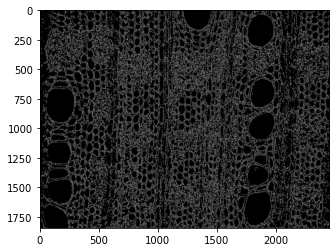

In [22]:
edges = cv.Canny(gray,100,200)
plt.imshow(edges, cmap="gray", vmin=0, vmax=255)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_cannyedges.png', edges)

Tratar de hacer el algoritmo de watershed 

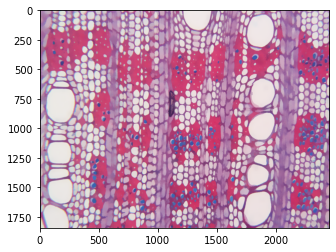

In [23]:
shifted = cv.pyrMeanShiftFiltering(img, 21, 51)

plt.imshow(shifted, cmap="gray", vmin=0, vmax=255)

In [24]:
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_shifted.png',shifted)

True

In [25]:
gray_shifted = cv.cvtColor(shifted,cv.COLOR_BGR2GRAY)
# global thresholding
ret1,th1_shifted = cv.threshold(gray_shifted,127,255,cv.THRESH_BINARY) #dst filter
# Otsu's thresholding
ret2,th2_shifted = cv.threshold(gray_shifted,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #dst filter
#
th1shifted_2 = cv.bitwise_not(th1_shifted)
th2shifted_2 = cv.bitwise_not(th2_shifted)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1shifted.png',th1_shifted)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2shifted.png',th2_shifted)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1shifted_2.png', th2shifted_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2shifted_2.png', th2shifted_2)

True

In [29]:
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(th2_shifted)
localMax = peak_local_max(D, indices=False, min_distance=20,
    labels=thresh)
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

[INFO] 2271 unique segments found


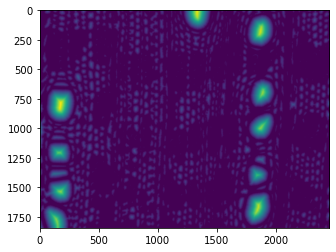

In [30]:
plt.imshow(D)

In [ ]:
# loop over the unique labels returned by the Watershed
# algorithm
for label in np.unique(labels):
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
    if label == 0:
        continue
    # otherwise, allocate memory for the label region and draw
    # it on the mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255
    # detect contours in the mask and grab the largest one
    cnts = cv.findContours(mask.copy(), cv.RETR_EXTERNAL,
        cv.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv.contourArea)
    # draw a circle enclosing the object
    ((x, y), r) = cv.minEnclosingCircle(c)
    cv.circle(img, (int(x), int(y)), int(r), (0, 255, 0), 2)
    cv.putText(img, "#{}".format(label), (int(x) - 10, int(y)),
        cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
# show the output image
plt.imshow(img)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_watershed.png',img)

True

In [22]:
# find contours in the thresholded image
#cnts = cv.findContours(th3_2, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts,hierarchy=cv.findContours(blur_thinned,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
#cnts = imutils.grab_contours(cnts)
hierarchy.shape
print(hierarchy)

[[[   1   -1   -1   -1]
  [   2    0   -1   -1]
  [   3    1   -1   -1]
  ...
  [1855 1853   -1   24]
  [1856 1854   -1   24]
  [  -1 1855   -1   24]]]


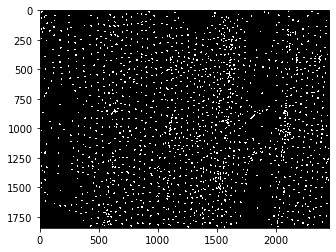

In [23]:
#make array of centroids
centroids=[]
#Array of areas
areas=[]
#Array for perimeters
perimeters=[]
# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv.moments(c) #que es moments?¡¿
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    # draw the contour and center of the shape on the image
    cv.drawContours(blur_thinned, [c], -1, (0, 255, 0), 2)
    cv.circle(blur_thinned, (cX, cY), 7, (255, 255, 255), -1)
    centroids.append([cX, cY])
    areas.append(cv.contourArea(c))
    perimeters.append(cv.arcLength(c,True))

    #cv.putText(th2, "center", (cX - 20, cY - 20),cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # display the image
    #cv.imshow("Image", th2)
plt.imshow(blur_thinned,cmap="gray", vmin=0, vmax=255)

In [25]:
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_blur_centroids.png', blur_thinned)

True

In [44]:
# find contours in the thresholded image
#cnts = cv.findContours(th3_2, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts,hierarchy=cv.findContours(th2blur_2,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
#cnts = imutils.grab_contours(cnts)
hierarchy.shape
print(hierarchy)

[[[   1   -1   -1   -1]
  [   2    0   -1   -1]
  [   3    1   -1   -1]
  ...
  [1860 1858   -1   25]
  [1861 1859   -1   25]
  [  -1 1860   -1   25]]]


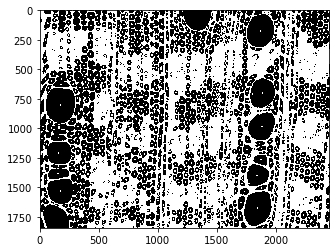

In [49]:
#make array of centroids
centroids_1=[]
#Array of areas
areas_1=[]
#Array for perimeters
perimeters_1=[]
# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv.moments(c) #que es moments?¡¿
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    # draw the contour and center of the shape on the image
    cv.drawContours(th2blur_2, [c], -1, (0, 255, 0), 2)
    cv.circle(th2blur_2, (cX, cY), 7, (255, 255, 255), -1)
    centroids_1.append([cX, cY])
    areas_1.append(cv.contourArea(c))
    perimeters_1.append(cv.arcLength(c,True))

    #cv.putText(th2, "center", (cX - 20, cY - 20),cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # display the image
    #cv.imshow("Image", th2)
plt.imshow(th2blur_2,cmap="gray", vmin=0, vmax=255)

In [46]:
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_blur2centroids.png', th2blur_2)

True

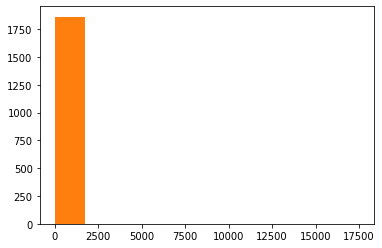

In [101]:
#plt.bar(perimeters,bins=bins, align='center')
#plt.xticks(ticks, labels)
plt.hist(perimeters)
plt.hist(perimeters_1)
plt.show()